# Diabetes_Prediction
# Using_Decision_Tree & Random_Forest

The diabetes_prediction_dataset.csv file contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. The Dataset can be utilized to construct machine learning models that can predict the likelihood of diabetes in patients based on their medical history and demographic details.

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)  

                                



In [86]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [87]:
# Checking values for 'object' datatype
df.select_dtypes(include='object').nunique()

gender             3
smoking_history    6
dtype: int64

In [88]:
#Checking for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [89]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


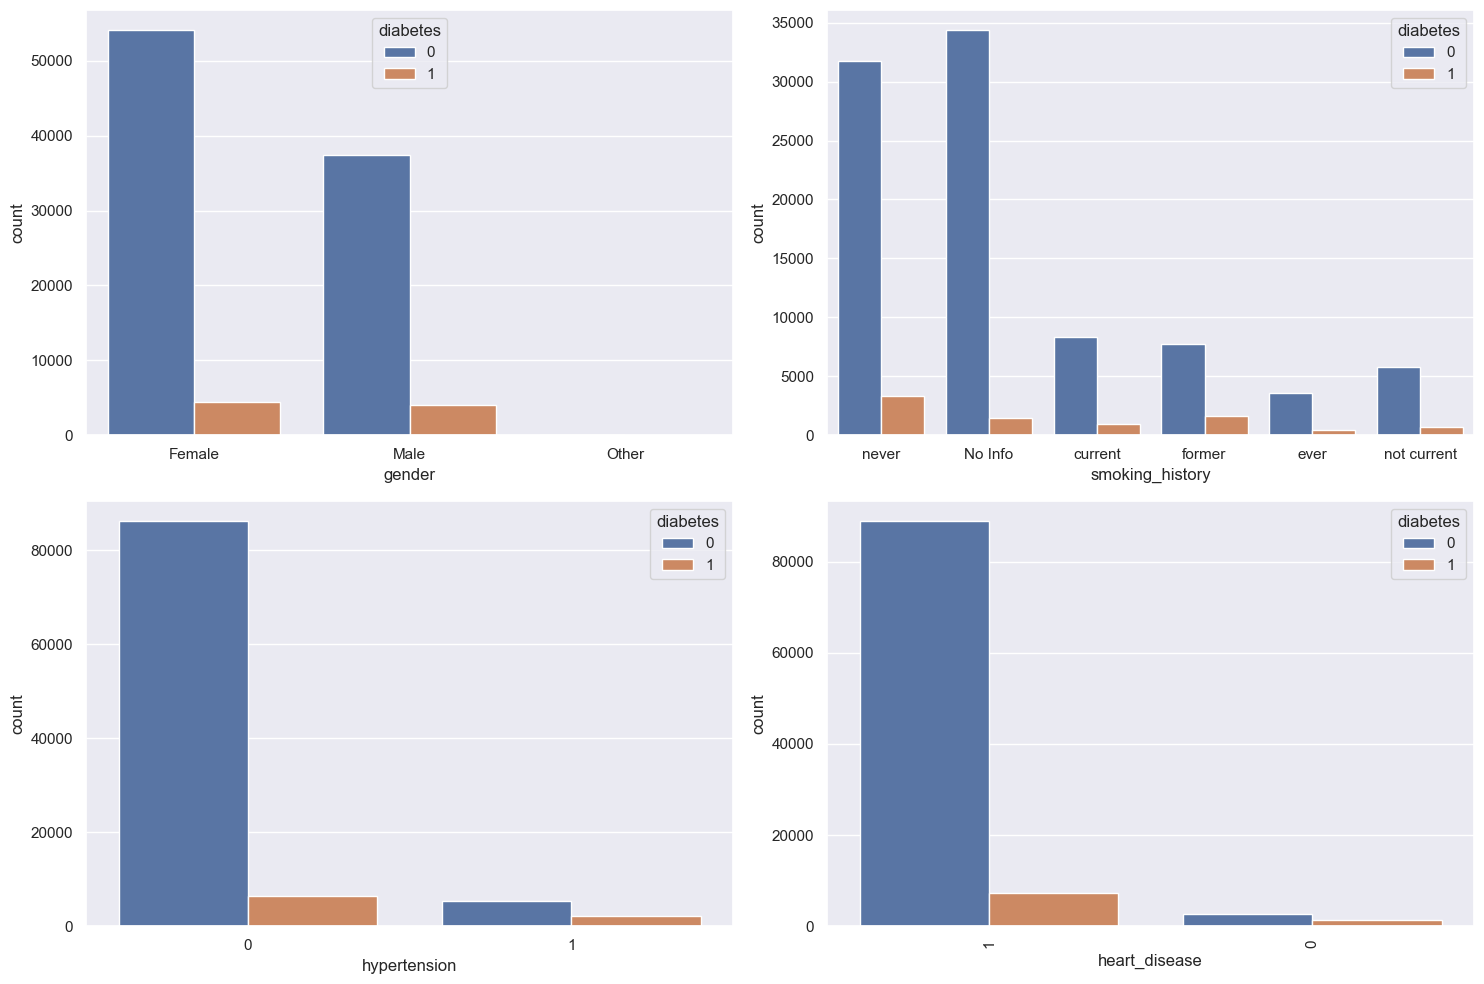

In [90]:
import warnings
warnings.filterwarnings('ignore')
# List of catagorial variables to plot
cat_var=['gender','smoking_history','hypertension','heart_disease']

#Create figure with subplots

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
axs=axs.flatten()

#Create barplot for each catagorical variable

for i, var in enumerate(cat_var):
    sns.countplot(x=var,hue='diabetes',data=df,ax=axs[i])
axs[i].set_xticklabels(df[var].unique(),rotation=90)
# adjusting space between subplots
fig.tight_layout()
plt.show()

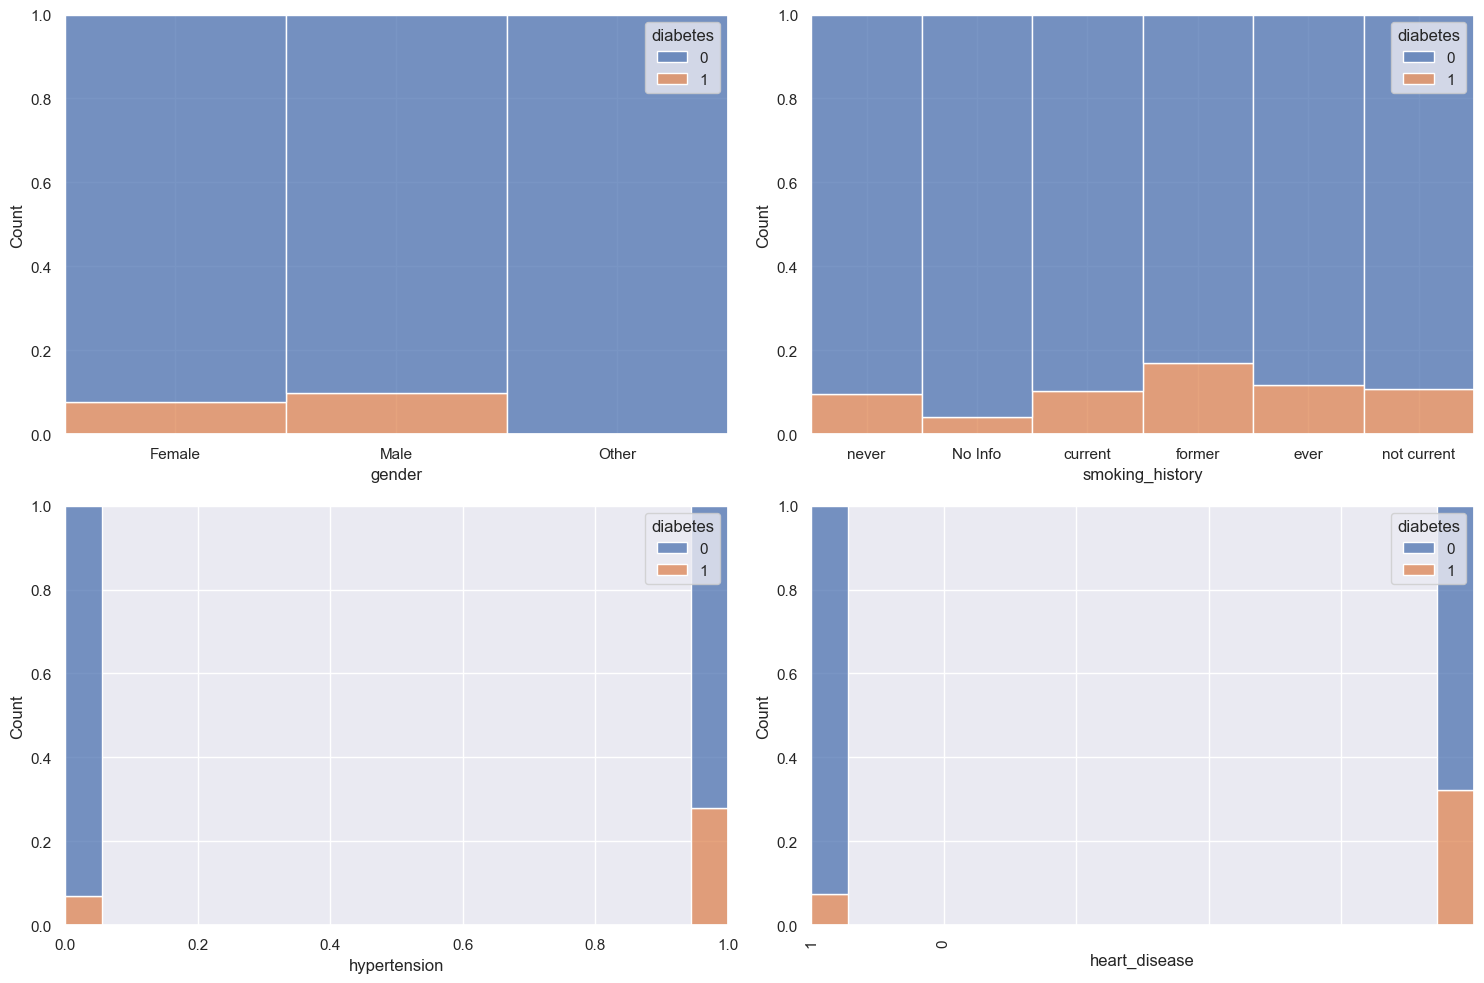

In [91]:
import warnings
warnings.filterwarnings('ignore')
# List of catagorial variables to plot
cat_var=['gender','smoking_history','hypertension','heart_disease']

#Create figure with subplots

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
axs=axs.flatten()

#Create histplot for each catagorical variable

for i, var in enumerate(cat_var):
    sns.histplot(x=var,hue='diabetes',data=df,ax=axs[i],multiple='fill',kde=False)
axs[i].set_xticklabels(df[var].unique(),rotation=90)
# adjusting space between subplots
fig.tight_layout()
plt.show()

# Numerical EDA

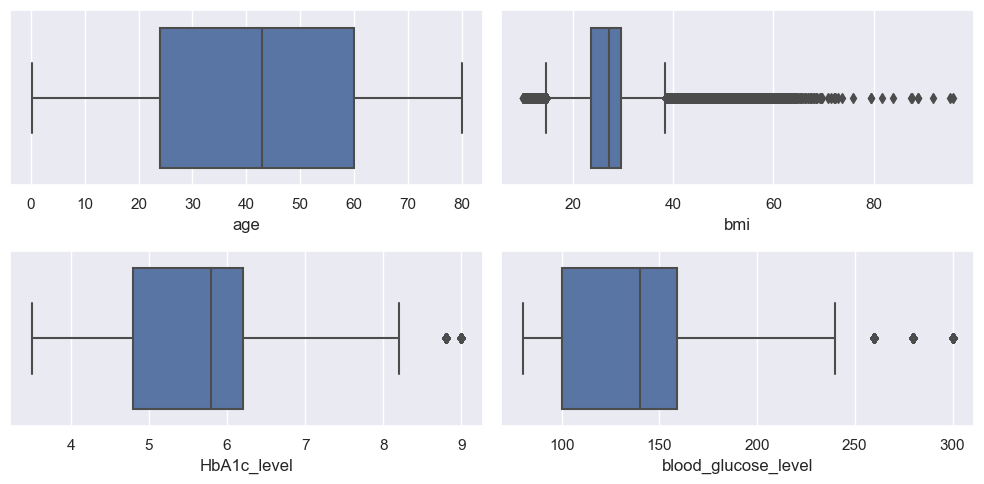

In [92]:
num_var=['age','bmi','HbA1c_level','blood_glucose_level']

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate(num_var):
    sns.boxplot(x=var,data=df,ax=axs[i])
fig.tight_layout()
plt.show()

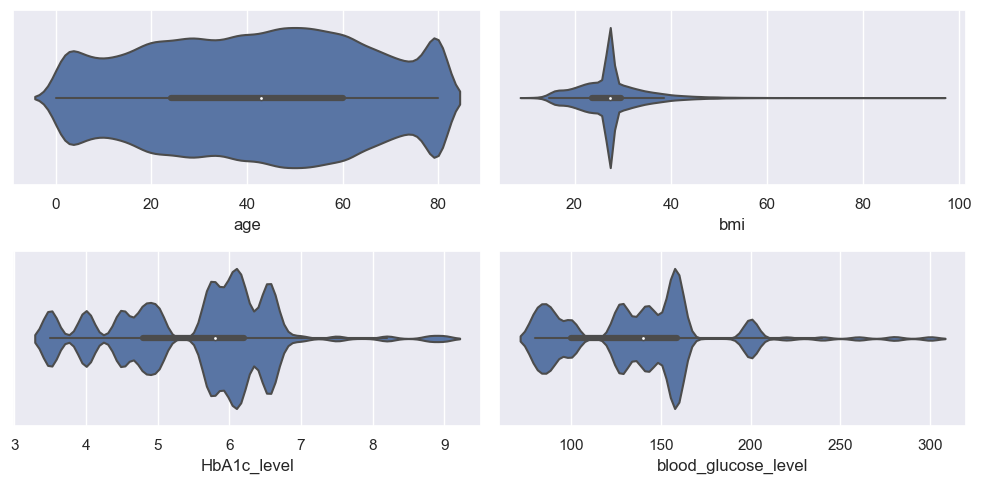

In [93]:
num_var=['age','bmi','HbA1c_level','blood_glucose_level']

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate(num_var):
    sns.violinplot(x=var,data=df,ax=axs[i])
fig.tight_layout()
plt.show()

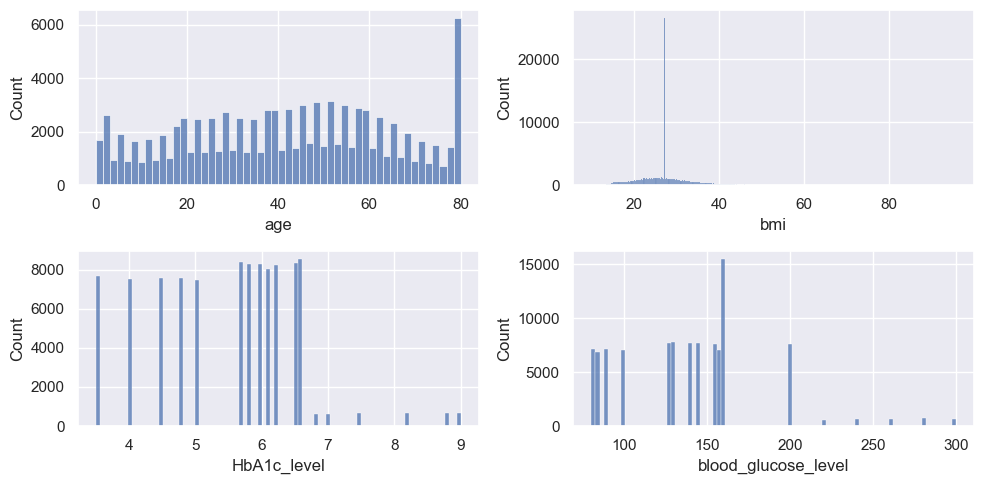

In [94]:
num_var=['age','bmi','HbA1c_level','blood_glucose_level']

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,5))
axs=axs.flatten()

for i, var in enumerate(num_var):
    sns.histplot(x=var,data=df,ax=axs[i])
fig.tight_layout()
plt.show()

# Data Preprocessing

In [95]:
df.shape

(100000, 9)

In [96]:
#Check missing value
#Finding out percentage of missing values in each column
check_missing=df.isnull().sum()*100/df.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)

Series([], dtype: float64)

# Label encoding each categorial column

In [100]:
# Loop over each column where datatype is object
for col in df.select_dtypes(include=['object']).columns:
    #Print the column name and unique value
    print(f"{col}:{df[col].unique()}")

gender:['Female' 'Male' 'Other']
smoking_history:['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [102]:
from sklearn import preprocessing

#Loop over each column in the DataFrame where datatype is 'object'

for col in df.select_dtypes(include=['object']).columns:
    
    #Initialize the labelEncoder object
    label_encoder=preprocessing.LabelEncoder()
    
    #Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    #Transform the column using the encoder
    df[col]=label_encoder.transform(df[col])
    
    #Print the column name and unique encoded values
    print(f"{col}:{df[col].unique()}")
    

gender:[0 1 2]
smoking_history:[4 0 1 3 2 5]


# Check the Label Value 'Diabetes' if is balanced or not

0    91500
1     8500
Name: diabetes, dtype: int64

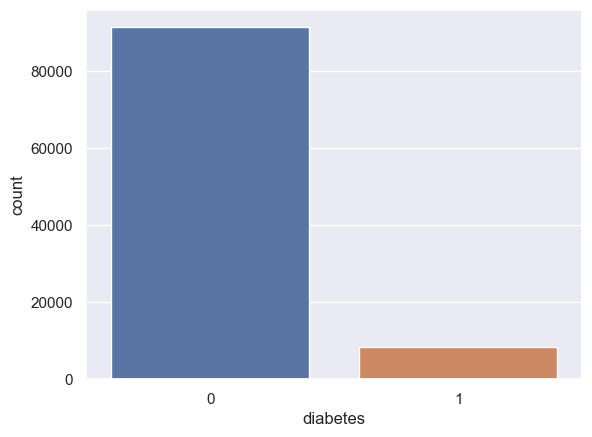

In [104]:
sns.countplot(df['diabetes'])
df['diabetes'].value_counts()

# Undersampling Majority Class

In [113]:
pip install -U imbalanced-learn


     ------------------------------------ 226.0/226.0 kB 627.2 kB/s eta 0:00:00


In [116]:
from imblearn.under_sampling import RandomUnderSampler

X=df.drop('diabetes',axis=1)
y=df['diabetes']

rus=RandomUnderSampler(random_state=42)
X_resampled,y_resampled=rus.fit_resample(X,y)

#create a new DataFrame with undersampled data

df_resampled=pd.concat([X_resampled,y_resampled],axis=1)


0    8500
1    8500
Name: diabetes, dtype: int64

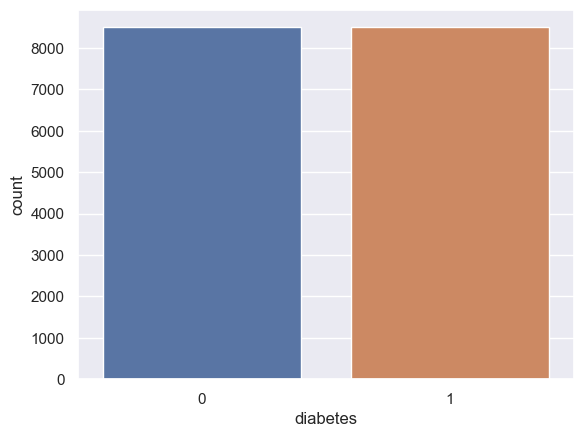

In [117]:
sns.countplot(df_resampled['diabetes'])
df_resampled['diabetes'].value_counts()

# Check the Outliers using Z-Score

In [125]:
from scipy import stats

#define function to remove outliers using z-score for onlt selected numerical columns

def remove_outliers(df_resampled,cols,threshold=3):
    #Loop over each selected column
    
    for col in cols:
        #calculate z-score for each data point in selected column
        z=np.abs(stats.zscore(df_resampled[col]))
        #remove rows with z-score greater than threshold in selected column
        df_resampled=df_resampled[(z<threshold)|(df_resampled[col].isnull())]
    return df_resampled
        

In [127]:
selected_cols=['bmi','HbA1c_level','blood_glucose_level']
df_clean=remove_outliers(df_resampled,selected_cols)
df_clean.shape

(16786, 9)

# Heat Map Corelation

<AxesSubplot:>

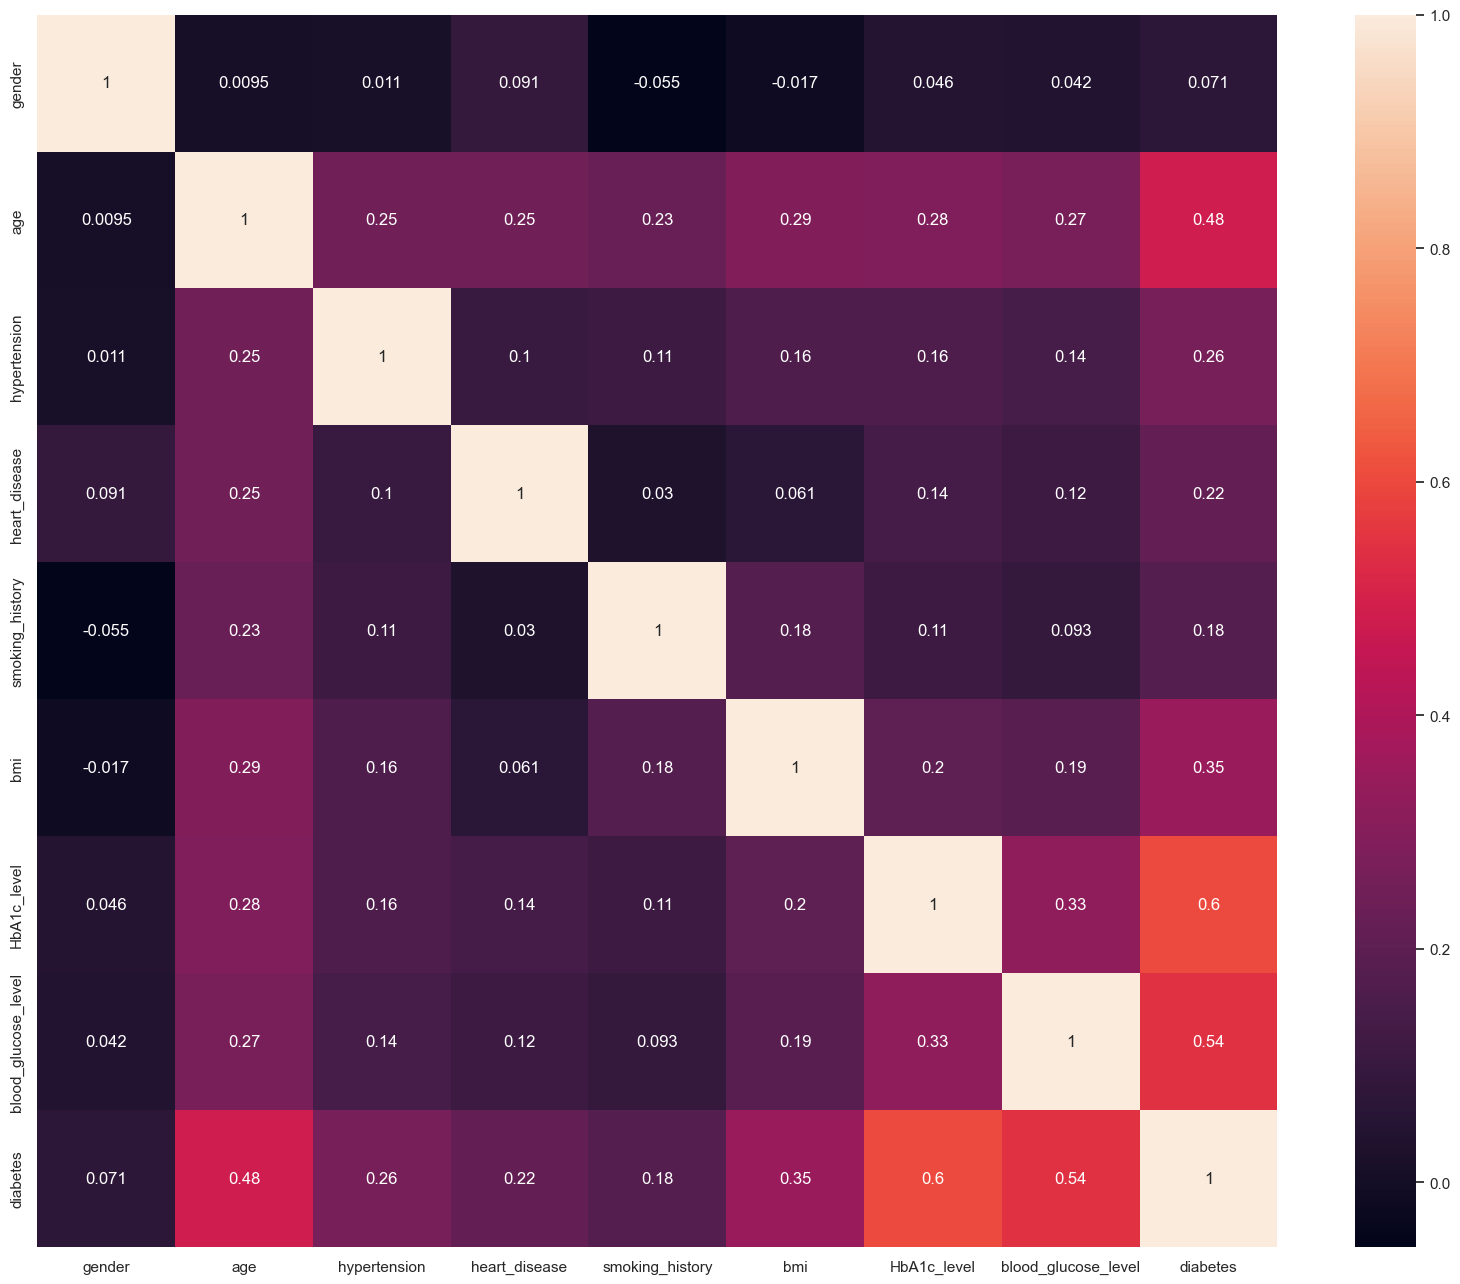

In [128]:
plt.figure(figsize=(20,16))
sns.heatmap(df_clean.corr(),fmt='.2g',annot=True)

# Train Test_Split

In [158]:
X=df_clean.drop('diabetes',axis=1)
y=df_clean['diabetes']

In [159]:
X.shape

(16786, 8)

In [160]:
y.shape

(16786,)

In [163]:
#test size 20% and the train size 80%

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


# Decision Tree

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier()
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4]
}

#Perform a gridsearch with cross-validation to find the best hyperparameters
grid_search=GridSearchCV(dtree,param_grid,cv=3)
grid_search.fit(X_train,y_train)

#print the best hyper parameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [168]:
dtree=DecisionTreeClassifier(random_state=0,max_depth=8,min_samples_leaf=1,min_samples_split=2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [170]:
y_pred=dtree.predict(X_test)
print('Accuracy_Score:',round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy_Score: 89.79 %


In [174]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,jaccard_score,log_loss
print('F1-Score:',(f1_score(y_test,y_pred,average='micro')))
print('Precision_Score:',(precision_score(y_test,y_pred,average='micro')))
print('Recall_Score:',(recall_score(y_test,y_pred,average='micro')))
print('Jaccard_Score:',(jaccard_score(y_test,y_pred,average='micro')))
print('Log_Loss:',(log_loss(y_test,y_pred)))

F1-Score: 0.8978558665872544
Precision_Score: 0.8978558665872544
Recall_Score: 0.8978558665872544
Jaccard_Score: 0.8146446906241557
Log_Loss: 3.6816477404607455


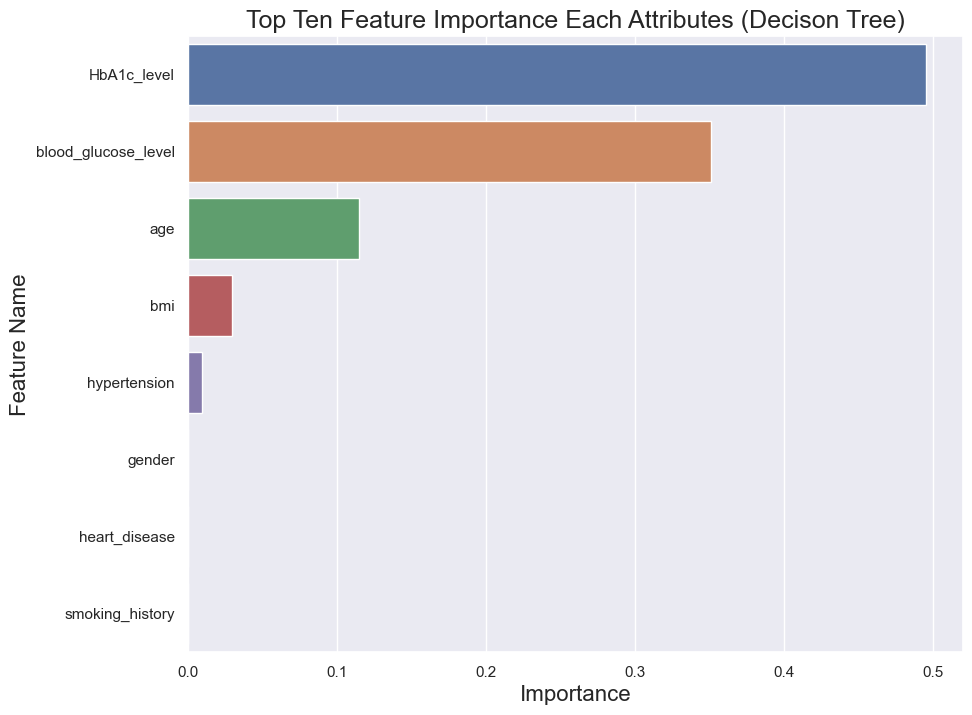

In [176]:
imp_df=pd.DataFrame({
    'Feature Name':X_train.columns,
    'Importance':dtree.feature_importances_
    
})

fi=imp_df.sort_values(by='Importance',ascending=False)
fi2=fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2,x='Importance',y='Feature Name')
plt.title('Top Ten Feature Importance Each Attributes (Decison Tree)',fontsize=18)
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature Name',fontsize=16)
plt.show()

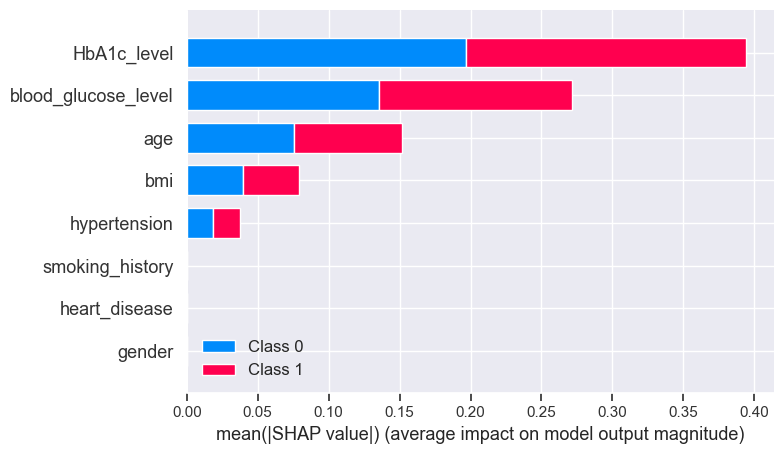

In [178]:
import shap
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)

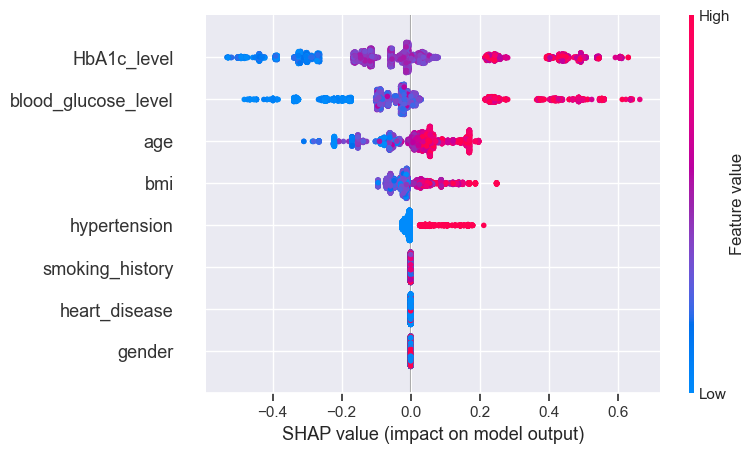

In [179]:
# Compute SHAP values
explainer=shap.TreeExplainer(dtree)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test.values,feature_names=X_test.columns)



Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8978558665872544')

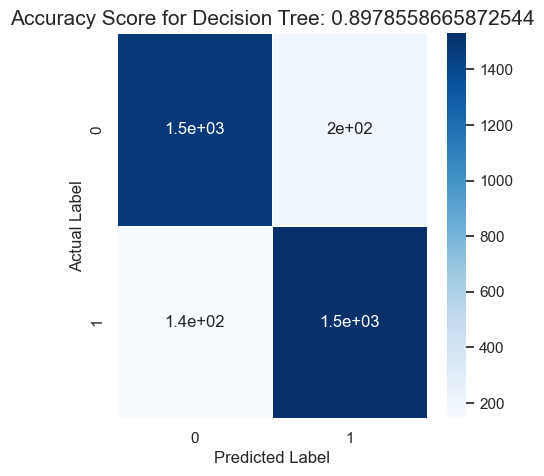

In [181]:
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(data=cm,linewidths=.5,annot=True,cmap='Blues')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    all_sample_title='Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test,y_test))
    plt.title(all_sample_title, size=15)

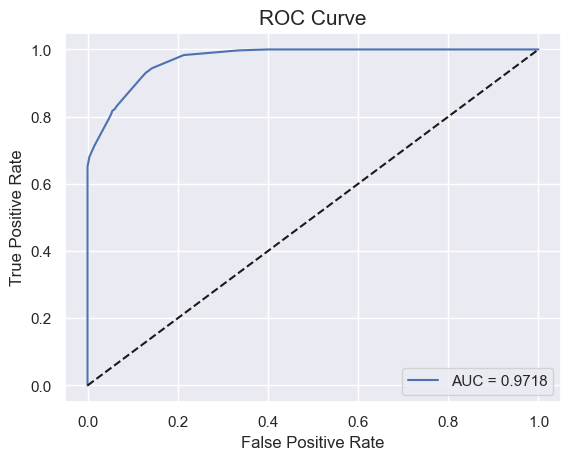

In [185]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba=dtree.predict_proba(X_test)[:][:,1]
df_actual_predicted=pd.concat([pd.DataFrame(np.array(y_test),columns=['y_actual']),pd.DataFrame(y_pred_proba,columns=['y_pred_proba'])],axis=1)
df_actual_predicted.index=y_test.index
fpr,tpr,tr=roc_curve(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_proba'])
auc=roc_auc_score(df_actual_predicted['y_actual'],df_actual_predicted['y_pred_proba'])
plt.plot(fpr,tpr,label='AUC = %0.4f' %auc)
plt.plot(fpr,fpr,linestyle='--',color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',size=15)
plt.legend()

# Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [191]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [192]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 90.38 %


In [193]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9038117927337701
Precision Score :  0.9038117927337701
Recall Score :  0.9038117927337701
Jaccard Score :  0.8245042108122793
Log Loss :  3.4669744028245506


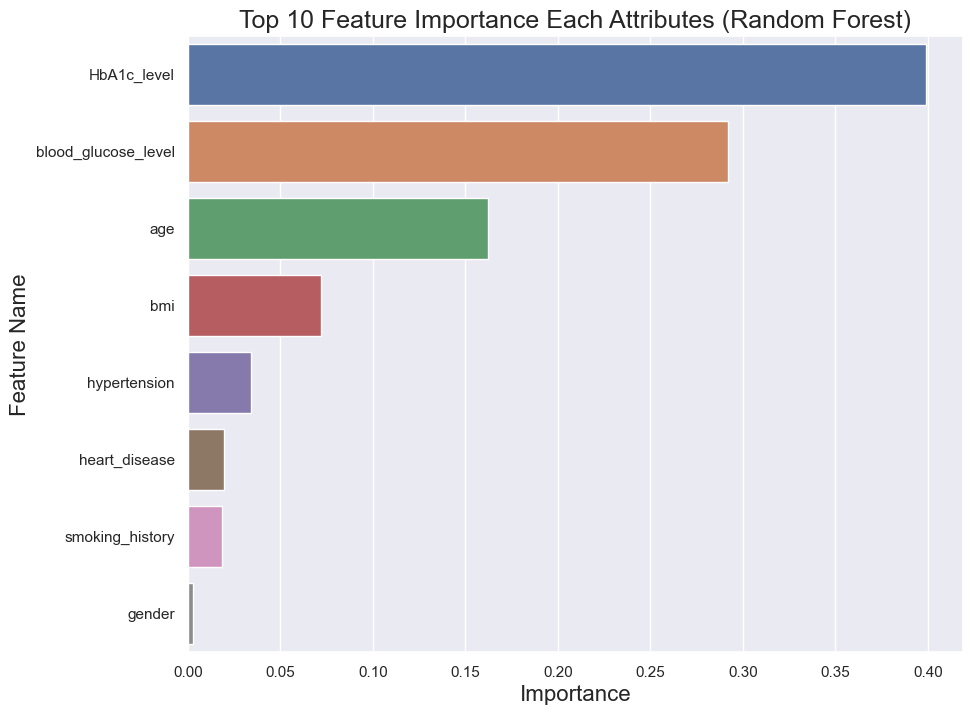

In [194]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

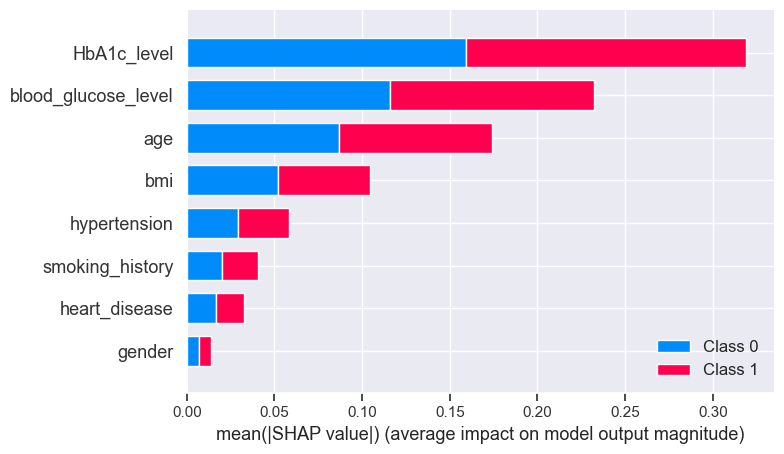

In [195]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

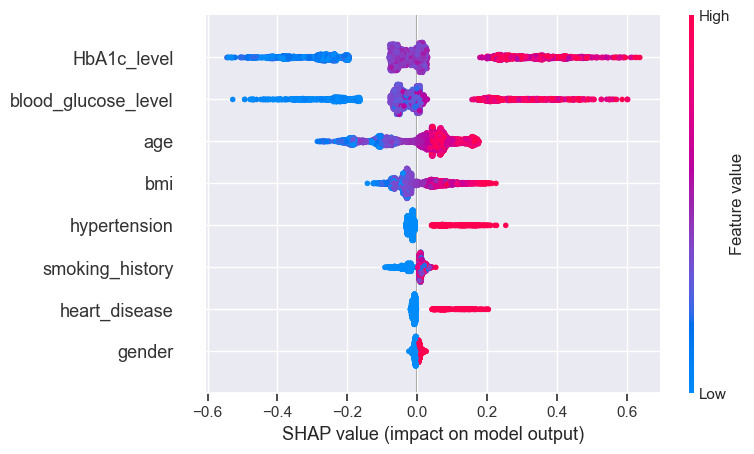

In [196]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.9038117927337701')

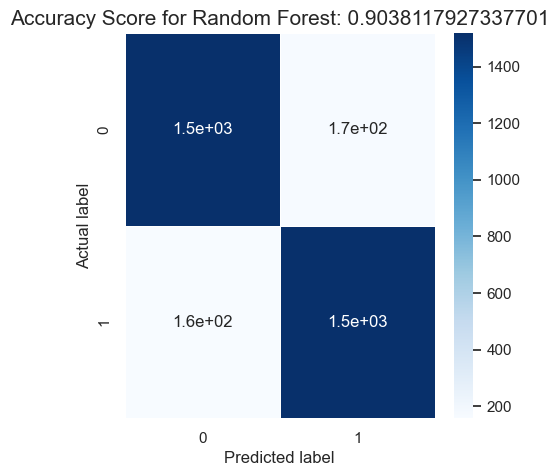

In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

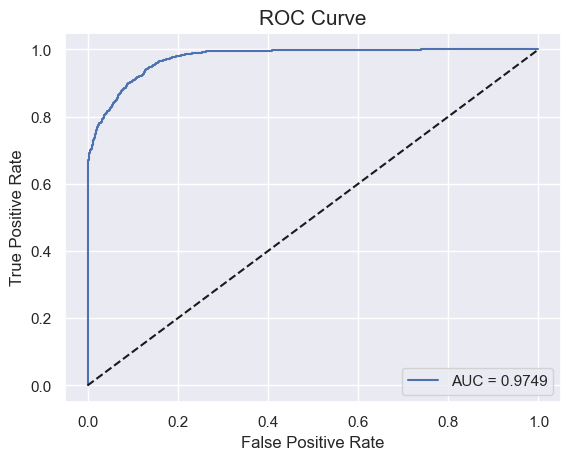

In [198]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()